### 라이브러리 선언 및 데이터 불러오기

In [1]:
# 데이터 처리 라이브러리
import pandas as pd
import numpy as np

# 머신러닝 라이브러리
from sklearn import tree
from sklearn import ensemble

In [2]:
featuresData = pd.read_csv("../dataset/feature_regression_example.csv")

# A. 데이터 전처리

### A-1. 타입 통합 / 특성 숫자컬럼 추가

In [3]:
# 데이터 타입 통합
featuresData["REGIONID"] = featuresData["REGIONID"].astype(str)
featuresData["PRODUCTGROUP"] = featuresData["PRODUCTGROUP"].astype(str)

In [4]:
# 특성값 숫자컬럼 변경

In [5]:
featuresData["PROMOTION_LB"] = np.where( featuresData.PROMOTION == "Y", 1, 0)

In [6]:
featuresData["HOLIDAY_LB"] = np.where( featuresData.HOLIDAY =="Y", 1, 0 )

### A-2 특성 선정 / 데이터 분리

In [7]:
# stdCorrRepeat = np.array( list( range(3,8,1) ) ) / 10

In [8]:
corrDf = featuresData.corr()

In [9]:
stdCorr = 0.3

In [10]:
features = list( corrDf.loc[ (abs( corrDf.QTY)  > stdCorr) & (abs( corrDf.QTY) != 1) ].index )
features

['HCLUS', 'PRO_PERCENT', 'PROMOTION_LB', 'HOLIDAY_LB']

In [11]:
label=["QTY"]

In [12]:
# 특성 선정
corrDf = featuresData.corr()
stdCorr = 0.5

In [13]:
features = list( corrDf.loc[ (abs(corrDf.QTY) >= stdCorr) & (corrDf.QTY != 1) ].index ) 

In [14]:
label = ["QTY"]

In [15]:
featuresData.shape

(105, 14)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# 23 93, 88  66 47 102  47 99 13 1
# 96 68 38
trainingDataFeatures,\
testDataFeatures,\
trainingDataLabel,\
testDataLabel= train_test_split(featuresData.loc[:,features],
                                 featuresData.loc[:,label],
                                 test_size=0.2, 
                                 random_state=10)

In [18]:
print(trainingDataFeatures.shape)
print(testDataFeatures.shape)
print(trainingDataLabel.shape)
print(testDataLabel.shape)

(84, 4)
(21, 4)
(84, 1)
(21, 1)


In [19]:
sortKey = ["YEARWEEK"]

In [20]:
sortedData = featuresData.sort_values(sortKey).reset_index(drop=True)

In [21]:
stdYearweek = 2016

In [46]:
trainingDataFeatures = featuresData.loc[featuresData.YEAR < stdYearweek, features]
trainingDataLabel = featuresData.loc[featuresData.YEAR < stdYearweek, label]
testDataFeatures = featuresData.loc[featuresData.YEAR >= stdYearweek, features]
testDataLabel = featuresData.loc[featuresData.YEAR >= stdYearweek, label]

In [49]:
print( trainingDataFeatures.shape )
print( trainingDataLabel.shape )
print( testDataFeatures.shape )
print( testDataLabel.shape )

(53, 4)
(53, 1)
(52, 4)
(52, 1)


# B 모델 적용

### B-3. 모델적용

In [50]:
from sklearn import tree

In [51]:
dtModel = tree.DecisionTreeRegressor(random_state=10)

In [52]:
# 훈련
dtModel.fit(X=trainingDataFeatures, y=trainingDataLabel)

DecisionTreeRegressor(random_state=10)

# c-4. 예측

In [53]:
import matplotlib.pyplot as plt

In [54]:
%matplotlib inline

In [55]:
from sklearn.tree import plot_tree

[Text(0.61, 0.9285714285714286, 'X[1] <= 0.259\nsquared_error = 791297.109\nsamples = 53\nvalue = 1186.849'),
 Text(0.38, 0.7857142857142857, 'X[2] <= 0.5\nsquared_error = 282086.368\nsamples = 44\nvalue = 890.636'),
 Text(0.16, 0.6428571428571429, 'X[0] <= 2.5\nsquared_error = 66518.09\nsamples = 17\nvalue = 427.706'),
 Text(0.08, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 337.0'),
 Text(0.24, 0.5, 'squared_error = 70129.109\nsamples = 16\nvalue = 433.375'),
 Text(0.6, 0.6428571428571429, 'X[0] <= 3.0\nsquared_error = 197924.469\nsamples = 27\nvalue = 1182.111'),
 Text(0.4, 0.5, 'X[1] <= 0.224\nsquared_error = 177291.389\nsamples = 12\nvalue = 1385.333'),
 Text(0.32, 0.35714285714285715, 'X[1] <= 0.209\nsquared_error = 143235.673\nsamples = 7\nvalue = 1266.429'),
 Text(0.16, 0.21428571428571427, 'X[0] <= 1.5\nsquared_error = 176400.0\nsamples = 2\nvalue = 1390.0'),
 Text(0.08, 0.07142857142857142, 'squared_error = 0.0\nsamples = 1\nvalue = 970.0'),
 Text(0.24, 0.07142857142857142

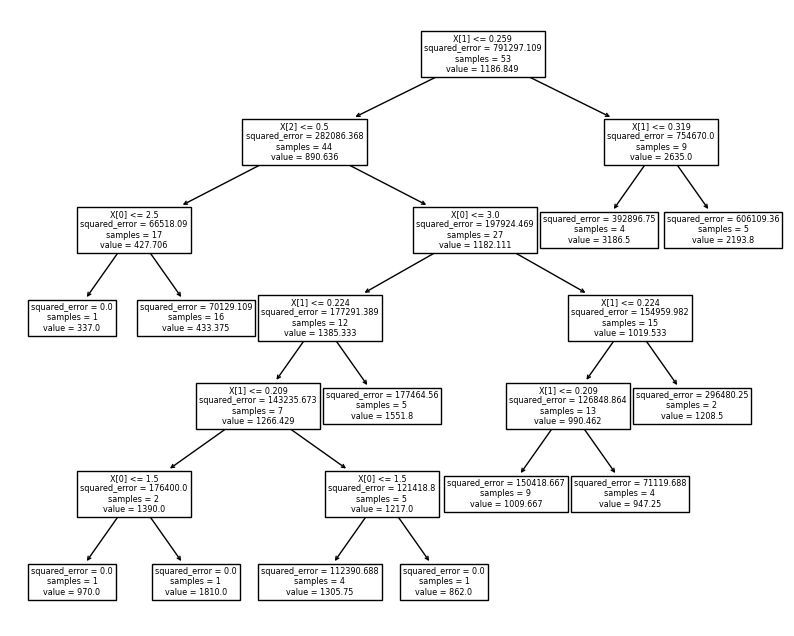

In [56]:
plt.figure(figsize=(10,8))
plot_tree(dtModel)

# c-4. 예측

In [57]:
testDataFeatures.shape

(52, 4)

In [59]:
predictValueDt = dtModel.predict(testDataFeatures)

In [65]:
testDataLabel["DT_PREDICT"] = predictValueDt

In [67]:
finalValue = testDataLabel